In [37]:
%Notebook for polynomial regression
data= load('text35.csv');

X=data(:,1);
m=size(X,1);
y=data(:,2);

Xval = X(round(size(X,1)*0.6):size(X,1));
yval = y(round(size(y,1)*0.6):size(y,1));

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];

Normalized Training Example 1:
  1.000000  
  -1.649780  
  -1.117133  
  -0.880571  
  -0.747916  
  -0.661133  
  -0.598883  
  -0.551505  
  -0.513930  

Program paused. Press enter to continue.
Iteration   200 | Cost: 1.120380e+03


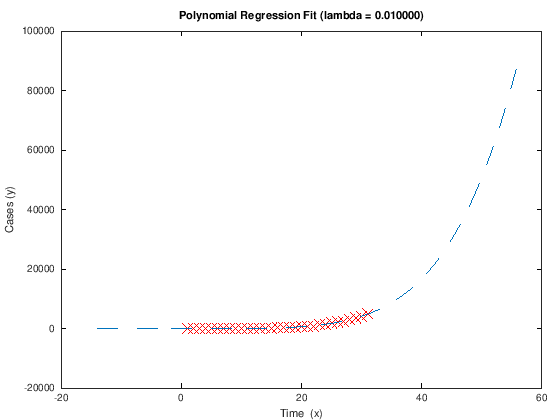

In [38]:
% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

fprintf('\nProgram paused. Press enter to continue.\n');

lambda = 0.01;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Time  (x)');
ylabel('Cases (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

Iteration   200 | Cost: 1.028788e+03
Iteration   200 | Cost: 1.038795e+03
Iteration   200 | Cost: 1.058863e+03
Iteration   200 | Cost: 1.120380e+03
Iteration   200 | Cost: 1.271964e+03
Iteration   199 | Cost: 1.724040e+03
Iteration   144 | Cost: 2.858117e+03
Iteration    92 | Cost: 6.294509e+03
Iteration    52 | Cost: 1.495636e+04
Iteration    29 | Cost: 4.233086e+04
lambda		Train Error	Validation Error
 0.000000	1028.788198	1958.930154
 0.001000	1028.679220	1958.972682
 0.003000	1030.760620	1969.482521
 0.010000	1038.096496	1997.316728
 0.030000	1059.541823	2052.738565
 0.100000	1114.888431	2188.382183
 0.300000	1245.316812	2456.520597
 1.000000	1675.693891	3050.520272
 3.000000	2474.338056	3933.729443
 10.000000	5084.108398	8144.571746


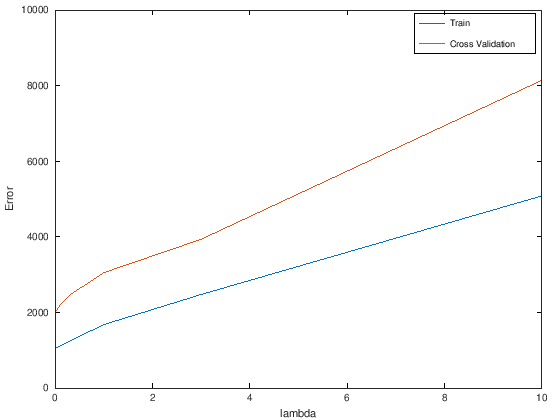

In [39]:
[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
        fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end


In [48]:
X_test=[31:33]';
X_poly = polyFeatures(X_test, p);
X_poly = bsxfun(@minus, X_poly, mu);
X_poly = bsxfun(@rdivide, X_poly, sigma);

In [49]:
X_poly = [ones(size(X_test, 1), 1) X_poly];

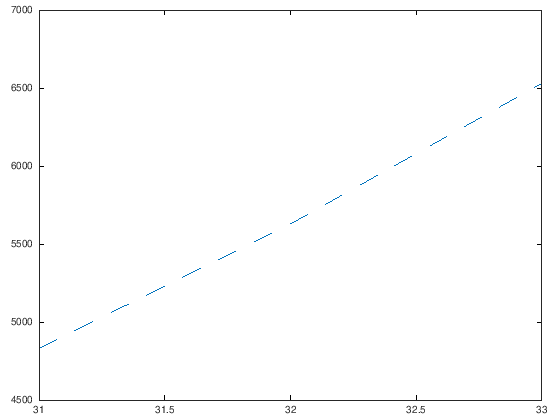

In [50]:
plot(X_test, X_poly * theta, '--', 'LineWidth', 2)

In [51]:
X_poly*theta

ans =

   4831.7
   5628.8
   6530.4

